## AB Testing Design

A/B testing also called split testing, originated from the randomized control trials in Statistics, is one of the most popular ways for Businesses to test new UX features, new versions of a product, or an algorithm to decide whether your business should launch that new product/feature or not.

### What is A/B testing and when to use it?
The idea behind A/B testing is that you show the variated version of the product to a sample of customers (the experimental group) and the existing version of the product to another sample of customers (the control group). Then, the difference in product performance in experimental/treatment versus the control group is tracked, to identify the effect of this new version(s) of the product on the performance of the product. So, the goal is then to track the metric during the test period and find out whether there is a difference in the performance of the product and what type of difference is it.
The motivation behind this test is to test new product variants that will improve the performance of the existing product and will make this product more successful and optimal, showing a positive treatment effect.
What makes this testing great is that businesses are getting direct feedback from their actual users by presenting them the existing versus variated product/feature options and in this way they can quickly test new ideas. In case the A/B test shows that the variated version/approach is not effective at least businesses can learn from it and decide whether they need to improve it or need to look for other ideas.

### Questions to ask before any A/B test
Given that the A/B test requires a significant amount of resources and might result in product decisions with a significant impact, it’s highly important to ask yourself, the product, and the engineering teams, and other stakeholders involved in the experiment a few essential questions before jumping to running the test.
What does a sample population look like and what are the customer segments for the target product?
- Can we find the answer to our business question using exploratory/historical data analysis (e.g. by using causal analysis)?
- Do we want to test single or multiple variants of the target product?
- Can we ensure truly randomized control and experimental groups s.t. both samples are an unbiased and true representation of the true user population?
- Can we ensure the integrity of the treatment vs control effects during the entire duration of the test?

### Choosing primary metric for the A/B test
Choosing the metric is one of the most important parts of the A/B test since this metric will be used to measure the performance of the product or feature for the experimental ad control groups and will be used to identify whether there is a statistically significant difference between these two groups.

Revenue is not always the end goal, so for the A/B test, we need to tie up the primary metric to the direct and the higher-level goals of the product. The expectation is that if the product makes more money, then this suggests the content is great. But in achieving that goal, instead of improving the overall content of the material and writing, one can just optimize the conversion funnels. One way to test the accuracy of a metric you have chosen for your A/B test could be to go back to the exact problem you want to solve. You can ask yourself the following question:

Metric Validity Question: If this chosen metric were to increase significantly while everything else stays constant, would we achieve our goal and address the problem?

### Common A/B test metrics
Popular performance metrics that are often used in A/B testing are the Click Through Rate, Click Through Probability and Conversion Rate.

- 1: Click-Through Rate (CTR) for usage: This number is the percentage of people who view the page (impressions) and then actually click on it (clicks).

$$CTR = 100\times\frac{Clicks}{Impressions}$$

- 2. Click-Through Probability (CTP) for impact: Unlike the CTR, the CTP does take into account the duplicate clicks which means that if a user for some reason has performed multiple clicks, in a single session, on the same item for some reason (e.g. because of impatience), this multiple clicks is counted as a single click in CTP.

$$CTR = 100\times\frac{\text{# of people with at least one click}}{\text{# Unique number of visitors}}$$

- 3. Conversion Rate: Conversion rate, defined as the proportion of sessions ending up with a transaction.

$$CTR = 100\times\frac{\text{# of converted}}{\text{# of converted + # of not converted}}$$

### Stating the hypothesis of the test
A/B test should always be based on a hypothesis that needs to be tested. This hypothesis is usually set as a result of brainstorming and collaboration of relevant people on the Product team and Data Science team. The idea behind this hypothesis is to decide how to ‘fix’ a potential issue in the product where a solution of these problems will influence the Key Performance Indicators (KPIs) of interest?

For example, if the KPI of the product is to improve the quality of the recommender system’s recommendations and this can be done for example by adding Impression Discounting or building a Re-ranker model for the recommender. However, the impact of these two solutions will likely be different on the amount of improvement of the quality of the recommendations. Namely, the re-ranker model affects the ranks of the recommendations by potentially changing the set of recommendations presented to the user, unlike impression discounting which just makes sure that the user doesn’t see the recommendations that were previously viewed to the user.

For this particular example, we could decide to build a re-ranked model which we expect to improve the quality of the target recommender (let’s name this imaginary recommender system, RecSys). 

Hypothesis: Adding an XGBoost re-ranker model to the existing RecSys recommender will increase the CTR of the recommendations, that is, will improve the quality of the RecSys recommendations.

### Designing the A/B test
Following are the steps you need to take to have a solid design for your A/B test.

- Step 1: Statistical Hypothesis
$$
  \begin{cases}
    H_0:& p_{con}=p_{exp}\\
    H_1: &p_{con}\neq p_{exp}
\end{cases}
$$

$$
  \begin{cases}
    H_0:& \mu_{con}=\mu_{exp}\\
    H_1: &\mu_{con}\neq \mu_{exp}
\end{cases}
$$

- Step 2: Power Analysis
To make sure that our results are repeatable, robust, and can be generalized to the entire population we need to avoid p-hacking, to ensure real statistical significance and to avoid biased results, we want to make sure we collect “enough” amount of observations and we run the test for a minimum predetermined amount of time. Therefore, before running the test we need to determine the sample size of the control and experimental groups and for how long we need to run the test. This process is often referred to as Power Analysis and it includes 3 specific steps: determining the power of the test, determining the significance level of the test, and determining a Minimum Detectable Effect. 

     - Power of the Test
     The power of the statistical test is the probability of correctly rejecting the null hypothesis. Power is the probability of making a correct decision (to reject the null hypothesis) when the null hypothesis is false.
     
    The power, often defined by (1-beta) is equal to the probability of not making a type II error, where Type II error is the probability of not rejecting the null hypothesis while the null is false.
    It’s common practice to pick 80% as the power of the A/B test, that is 20% Type II error which means that we are fine with not detecting (failing to reject the null) a treatment effect while there is an effect. 

    - Significance level of the test
    The significance level which is also the probability of Type I error is the likelihood of rejecting the null, hence detecting a treatment effect, while the null is true and there is no statistically significant impact. This value, often defined by the Greek letter alpha, α, is the probability of making a false discovery often referred to as a false-positive rate.
    Generally, we use the significance value of 5% which indicates that we have a 5% risk of concluding that there exists a statistically significant difference between the experimental and control variant performances when there is no actual difference. So, we are fine by having 5 out of 100 cases detecting a treatment effect while there is no effect. It also means that you have a significant result difference between the control and the experimental groups with a 95% confidence.

    - Minimum Detectable Effect (d)
    From the business point of view, what is the substantive to the statistical significance that the business wants to see as a minimum impact of the new version to find this variant investment-worthy?
    The answer to this question is what form the amount of change we aim to observe in the new version’s metric compared to the existing one to make recommendations to the business that this feature should be launched in the production. An estimate of this parameter is what is known as the Minimum Detectable Effect, often defined by the Greek letter delta, which is also related to the practical significance of the test. MDE is a proxy that relates to the smallest effect that would matter in practice for the business and is usually set by stakeholders.

- Step 3: Calculating minimum sample size
Another very important part of A/B testing is determining the minimum sample size of the control and experimental groups, which needs to be determined using the defined power of the test (1-beta), the significance level (alpha), Minimum Detectable Effect (MED), and the variances of the two Normally Distributed samples of equal size. Calculation of the sample size depends on the underlying primary metric that you have chosen for tracking the progress of the control and experimental versions. Here we distinguish two cases; case 1 where the primary metric of A/B testing is in the form of a binary variable (e.g. click or no click) and case 2 where the primary metric of the test is in the form of proportions or averages (e.g. mean order amount).

 - Case 1: Sample Size Calculation with Binary Metric
   When we are dealing with a primary performance tracking metric that has two possible values such as the Click Through Rate where the user can either click (success) or not click (failure) and if the users’ responses to the product can be defined as “independent” events then we can consider this as Bernoulli Trials where the click event (success) occurs with probability p_con in case of the Control Group and p_exp in case of the Experimental Group.
   
   $$N = \frac{(Z_{1-\frac{\alpha}{2}}sd_1 + Z_{1-\beta}sd_2)^2}{d^2}$$
   
   
  where $sd_1 = \sqrt{p(1-p)+p(1-p)}$ and $sd_2 = \sqrt{p(1-p)+(p+d)(1-(1-(p+d))}$

  - Case 2: Sample Size Calculation with Continuous Metric
When we are dealing with a primary performance tracking metric that is in the form of an average such as the mean order amount where we intend to compare the means of the Control and Experimental Groups, then we can use the Central Limit Theorem and state that the mean sampling distribution of both Control and Experimental Groups follow Normal Distribution. Consequently, the sampling distributions of difference of means of these two groups also follow Normal Distribution. That is:

$\bar X_{con} \sim N(\mu_{con},\sigma_{con}^2)$

$\bar X_{exp} \sim N(\mu_{exp},\sigma_{exp}^2)$

$\bar X_{con}-\bar X_{con} \sim N(\mu_{con}-\mu_{exp},\frac{\sigma_{con}^2}{N_{con}^2}+\frac{\sigma_{exp}^2}{N_{exp}^2})$

$N=\frac{(\sigma_{con}^2+\sigma_{exp}^2)(Z_{1-\frac{\alpha}{2}}+Z_{1-\beta})}{d^2}$


Following the industry standards, if $\alpha=0.05$, where $Z_{1-\frac{\alpha}{2}}=1.96$ and $\beta=0.2$ where $Z_{\beta}=0.84$, and assuming that $\sigma^2=\sigma_{con}^2=\sigma_{exp}^2$, we have

$$N=\frac{2\sigma^2\times (1.96+0.84)^2}{d^2}=\frac{16\sigma^2}{d^2}$$

   - Smaller $\alpha$--> more confidence level --> more number of samples
   - Smaller $\beta$--> More Power ($1-\beta$)--> more number of samples
   - Smaller variance--> less number of samples
   - Smaller delta (d) --> more number of samples


- Step 4 : Determining A/B test duration
As mentioned before, this question needs to be answered before you run your experiment not during, by trying to stop the test when you detect statistical significance. To determine the baseline of a duration time, a common approach is to use the following formula:
$$\text{Duration} = \frac{N}{\text{# of visitors per day}}$$

#### Too small test duration: Novelty Effects
Users tend to react quickly and positively to all types of changes independent of their nature. This positive effect to the experimental version that is entire since there is a change, regardless of what the change is, is referred to as novelty effect and it wears off in time and is thus considered “illusory”. So, it would be wrong to describe this effect to the experimental version itself and to expect that it will continue to persist after the novelty effect wears off.

#### Too large test duration: Maturation Effects
When planning an A/B test it is usually useful to consider a longer test duration for allowing users to get used to the new feature or product. In this way, one will be able to observe the real treatment effect by giving more time to returning users to cool down from an initial positive reaction or spike of interest due to a change that was introduced as part of a treatment. This should help to avoid novelty effect and thus better predictive value for the test outcome. However, the longer the test period the larger is the likelihood of external effects impacting the reaction of the users and possibly contaminating the test results, maturation effect. Therefore, running the A/B test for too long is is also not recommended and can better be avoided to increase the reliability of the results.

### Running the A/B test
Once the preparation work has been done, with the help of engineering you can start running the A/B test. Firstly, the engineering team needs to make sure that the integrity between Control and Experimental groups is kept. Secondly, the mechanism storing users’ responses to the treatment has to be accurate and the same across all users to avoid systematic bias. There are also few things you want to avoid doing such as stopping the test too early once you detect statistical significance (small p-value) while you have not reached the minimum sample size calculated before starting the test.


## Analyzing A/B test results with Python
When it comes to interpreting the results of your A/B test, there is a set of values you should calculate to test the statistical hypothesis stated earlier (to test whether there is a statistically significant difference between control and experimental groups). This set includes:
- Choosing an appropriate statistical test
- Calculating the test statistics (T)
- Calculating the p-value of the test statistics
- Reject or fail to reject the statistical hypothesis (statistical significance)
- Calculate the margin of error (external validity of the experiment)
- Calculate confidence interval (external validity and practical significance of the experiment)

#### Choosing an appropriate statistical test
Once the interaction data of the Control and Experimental groups are collected, you can test the statistical hypothesis earlier by choosing an appropriate statistical test that is usually categorized in parametric and non-parametric tests. The choice of the test depends on the following factors:

   - format of the primary metric (underlying pdf)
   - sample size (for CLT)
   - nature of the statistical hypothesis (show that a relationship between two groups merely exists or identify the type of relationship between the groups)

The most popular parametric tests that are used in A/B testing are:
- 2 Sample T-test (when N < 30, metric follows student-t distribution, and you want to identify whether there exist a relationship and the type of relationship between control and experimental groups)
- 2 Sample Z-test (when N > 30, metric follows asymptotic Normal distribution and you want to identify whether there exist a relationship and the type of relationship between control and experimental groups)


The most popular non-parametric tests that are used in A/B testing are:
- Fishers Exact test (small N, identify and you want to identify whether there exist a relationship between control and experimental groups)
- Chi-Squared test (large N, identify and you want to identify whether there exist a relationship between control and experimental groups)
- Wilcoxon Rank Sum/Mann Whitney test (small N or large N, skewed sampling distributions, testing the difference in medians between control and experimental groups)

### 2-sample T-test
If you want to test whether there is a statistically significant difference between the control and experimental groups’ metrics that are in the form of averages (e.g. average purchase amount), metric follows student-t distribution and when the sample size is smaller than 30, you can use 2-sample T-test to test the following hypothesis:

$$
  \begin{cases}
    H_0:& \mu_{con}=\mu_{exp}\\
    H_1: &\mu_{con}\neq \mu_{exp}
\end{cases}
$$

where the sampling distribution of means of Control and Experiment group follows Student-t distribution with degrees of freedom N_con-1 and N_exp-1, respectively.

Then an estimate for the pooled variance of the two samples can be calculated as follows:

$$\hat s_{p}^2=\frac{(N_{con}-1)\sigma_{con}^2+(N_{exp}-1)\sigma_{exp}^2}{(N_{con}+N_{exp}-2)}(\frac{1}{N_{con}}+\frac{1}{N_{exp}})$$

In [ ]:
t=(xbar-mu)/sqrt(SE/N)
xbar=mu_diff=mu_con-mu_exp
mu=0

t=(mu_diff-0)/SD

Consequently, the test statistics of the 2-sample T-test with the hypothesis stated earlier can be calculated as follows:

$$T=\frac{\hat \mu_{con}-\hat \mu_{exp}}{\sqrt{\hat s_p^2}}$$

In order to test the statistical significance of the observed difference between sample means, we need to calculate the p-value of our test statistics. The p-value is the probability of observing values at least as extreme as the common value when this is due to a random chance.

$$p_{value} = Pr[t\leq T \text{ or } t\geq T]=2 \times Pr[t \geq T] $$

Finally, to determine how accurate the obtained results are and also to comment about the practical significance of the obtained results, you can compute the Confidence Interval of your test by using the following formula:

$$CI = [(\mu_{con}-\mu_{exp})-t_{1-\frac{\alpha}{2}}\times SE\text{ , } (\mu_{con}-\mu_{exp})+t_{1-\frac{\alpha}{2}}\times SE ]$$

where the $t_{(1-\alpha/2)}$ is the critical value of the test corresponding to the two-sided t-test with alpha significance level 

In [10]:
import numpy as np
from scipy.stats import t

N_con = 20
df_con = N_con - 1 # degrees of freedom of Control 
N_exp = 20
df_exp = N_exp - 1 # degrees of freedom of Experimental 

# Significance level
alpha = 0.05

# data of control group with t-distribution
X_con = np.random.standard_t(df_con,N_con)
# data of experimental group with t-distribution
X_exp = np.random.standard_t(df_exp,N_exp)

# mean of control
mu_con = np.mean(X_con)
# mean of experimental
mu_exp = np.mean(X_exp)

# variance of control
sigma_sqr_con = np.var(X_con)
#variance of control
sigma_sqr_exp = np.var(X_exp)

# pooled variance
pooled_variance_t_test = ((N_con-1)*sigma_sqr_con + (N_exp -1) * sigma_sqr_exp)/(N_con + N_exp-2)*(1/N_con + 1/N_exp)

# Standard Error
SE = np.sqrt(pooled_variance_t_test)

# Test Statistics
T = (mu_con-mu_exp)/SE

# Critical value for two sided 2 sample t-test
t_crit = t.ppf(1-alpha/2, N_con + N_exp - 2)

# P-value of the two sided T-test using t-distribution and its symmetric property
p2 = (1-t.cdf(T, N_con + N_exp - 2))*2
p_value = t.sf(T, N_con + N_exp - 2)*2 #1-cdf

# Margin of Error
margin_error = t_crit * SE
# Confidence Interval
CI = [(mu_con-mu_exp) - margin_error, (mu_con-mu_exp) + margin_error]

print("T-score: ", T)
print("T-critical: ", t_crit)
print(p2)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test: ", np.round(CI,2))

T-score:  -0.36922541885613425
T-critical:  2.024394164575136
1.2859907821109857
P_value:  1.2859907821109857
Confidence Interval of 2 sample Z-test:  [-0.73  0.51]


In [ ]:
-2.02, -0.36, mucon-muexp=0, 0.36, 2.02

if p>significance level
or
CI includes the zero point
we fail to reject tjhe null hypothesis
or, we dont have a sstatistically significant diferrence between the
contorl and treatment groups

## 2-sample Z-test
If you want to test whether there is a statistically significant difference between the control and experimental groups’ metrics that are in the form of averages (e.g. average purchase amount) or proportions (e.g. Click Through Rate), metric follows Normal distribution, or when the sample size is larger than 30 such that you can use Central Limit Theorem (CLT) to state that the sampling distributions of Control and Experimental groups are asymptotically Normal, you can use 2-sample Z-test. 

### Case 1: Z-test for comparing proportions (2-sided)
If you want to test whether there is a statistically significant difference between the Control and Experimental groups’ metrics that are in the form of proportions (e.g. CTR) and if the click event occurs independently, you can use a 2-sample Z-test to test the following hypothesis:

$$
  \begin{cases}
    H_0:& p_{con}=p_{exp}\\
    H_1: &p_{con}\neq p_{exp}
\end{cases}
$$

after collecting the interaction data of the Control and Experimental users, you can calculate the estimates of these two probabilities as follows:

$$ \hat p_{con}=\frac{X_{con}}{N_{con}}=\frac{\text{# clicks}_{con}}{\text{# impressions}_{con}}$$

$$ \hat p_{exp}=\frac{X_{exp}}{N_{exp}}=\frac{\text{# clicks}_{exp}}{\text{# impressions}_{exp}}$$

Since we are testing for the difference in these probabilities, we need to obtain an estimate for the pooled probability of success and an estimate for pooled variance, which can be done as follows:

$$\hat p_{p}=\frac{X_{con}+X_{exp}}{N_{con}+N_{exp}}$$

$$\hat s_p^2 =\hat p_p (1-\hat p_p)\times (\frac{1}{N_{con}}+\frac{1}{N_{exp}})$$

Consequently, the test statistics of the 2-sample Z-test for the difference in proportions can be calculated as follows:

$$Z=\frac{\hat p_{con}-\hat p_{exp}}{\sqrt{\hat s_p^2}}$$

$$p_{value} = Pr[t\leq Z \text{ or } t\geq Z]=2 \times Pr[t \geq Z] $$


reject the null
7.832495206930039e-11
Test Statistics stat:  6.503782823926798
Z-critical:  1.959963984540054
P_value:  7.832495206930039e-11
Confidence Interval of 2 sample Z-test for proportions:  [0.02 0.04]


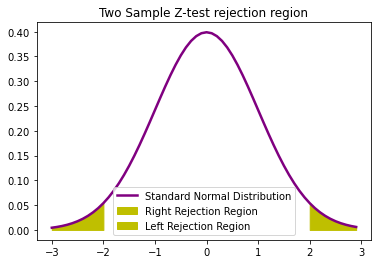

In [2]:
import numpy as np
from scipy.stats import norm

X_con = 1242 #clicks control
N_con = 9886 #impressions control
X_exp = 974 #clicks experimental
N_exp = 10072 #impressions experimetal

# Significance Level
alpha = 0.05

p_con_hat = X_con / N_con
p_exp_hat = X_exp / N_exp

p_pooled_hat = (X_con + X_exp)/(N_con + N_exp)
pooled_variance = p_pooled_hat*(1-p_pooled_hat) * (1/N_con + 1/N_exp)

# Standard Error
SE = np.sqrt(pooled_variance)

# test statsitics
Test_stat = (p_con_hat - p_exp_hat)/SE
# critical value usig the standard normal distribution
Z_crit = norm.ppf(1-alpha/2)

# Margin of error
m = SE * Z_crit
# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(Test_stat)*2

# Confidence Interval
CI = [(p_con_hat-p_exp_hat) - SE * Z_crit, (p_con_hat-p_exp_hat) + SE * Z_crit]

if np.abs(Test_stat) >= Z_crit:
    print("reject the null")
    print(p_value)

print("Test Statistics stat: ", Test_stat)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()

### Case 2: Z-test for comparing means (2-sided)
If you want to test whether there is a statistically significant difference between the Control and Experimental groups’ metrics that are in the form of averages (e.g. CTR) you can use a 2-sample Z-test to test the following hypothesis:

$$
  \begin{cases}
    H_0:& \mu_{con}=p_{exp}\\
    H_1: &\mu_{con}\neq p_{exp}
\end{cases}
$$

where the sampling distribution of means of Control and Experiment group follows Normal distribution with mean $\mu_{con}$ $\mu_{exp}$ and $\sigma_{con}^2/N_{con}$ $\sigma_{exp}^2/N_{exp}$, respectively. 

The difference in the means of the control and experimental groups also follows Normal distribution:

$$\hat \mu_{con}-\hat \mu_{exp}~N(\mu_{con}-\mu_{exp}, \frac{\sigma_{con}^2}{N_{con}}+\frac{\sigma_{exp}^2}{N_{exp}})$$

Consequently, the test statistics of the 2-sample Z-test for the difference in means can be calculated as follows:

$$z=\frac{\hat \mu_{con}-\hat \mu_{exp}}{\sqrt{\frac{\sigma_{con}^2}{N_{con}}+\frac{\sigma_{exp}^2}{N_{exp}}}} \text{ ~ } N(0,1)$$

$$p_{value} = Pr[z\leq Z \text{ or } z\geq Z]=2 \times Pr[z \geq Z] $$

$$CI = [(\mu_{con}-\mu_{exp})-z_{1-\frac{\alpha}{2}}\times SE\text{ , } (\mu_{con}-\mu_{exp})+z_{1-\frac{\alpha}{2}}\times SE ]$$

where the $z_{(1-\alpha/2)}$ is the critical value of the test corresponding to the two-sided z-test with alpha significance level 

Test Statistics stat:  0.7198825022121016
Z-critical:  1.959963984540054
P_value:  0.4715973423027163
Confidence Interval of 2 sample Z-test for proportions:  [-6.23 13.46]


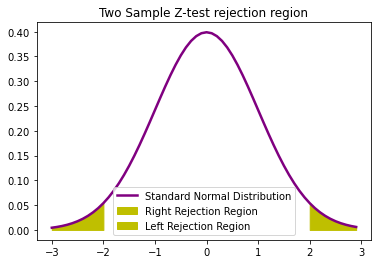

In [3]:
import numpy as np
from scipy.stats import norm

N_con = 60
N_exp = 60

# Significance Level
alpha = 0.05

X_A = np.random.randint(100, size = N_con)
X_B = np.random.randint(100, size = N_exp)

# Calculating means of control and experimental groups
mu_con = np.mean(X_A)
mu_exp = np.mean(X_B)

variance_con = np.var(X_A)
variance_exp = np.var(X_B)

# Pooled Variance
pooled_variance = np.sqrt(variance_con/N_con + variance_exp/N_exp)

# Test statistics
T = (mu_con-mu_exp)/np.sqrt(variance_con/N_con + variance_exp/N_exp)

# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(T)*2

# Z-critical value
Z_crit  = norm.ppf(1-alpha/2)

# Margin of error
m = Z_crit*pooled_variance

# Confidence Interval
CI = [(mu_con - mu_exp) - m, (mu_con - mu_exp) + m]


print("Test Statistics stat: ", T)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()

### Statistical Significance vs Practical Significance
During the statistical analysis phase of the A/B testing, when a small p-value is detected, then we speak about statistical significance. However, only statistical significance is not enough to make a recommendation about launching a feature or a product.
After statistical significance is detected, the next step is to understand whether there is a practical significance. This will help us to understand whether the detected difference in the performances of the two groups is large enough to justify the investment or it's too small and making a launch decision is not worth the investment.
One way to determine whether the A/B test has practical significance is to use the Confidence Interval and compare its lower bound to the MDE (estimate of the economic significance). More specifically, if the lower bound of CI is larger than the MDE (delta), then you can state that you have a practical significance. For example, if the CI = [5%, 7.5%] and the MDE = 3% then you can conclude to have a practical significance since 5% > 3%.
Note that, you should also look at the width of the CI and make sure it’s not too big since too wide CI gives you an indication that the precision of your results is small and the results will not be generalizable to the entire population (External Validity).